The Regression Line 
The correlation coefficient  r  doesn't just measure how clustered the points in a scatter plot are about a straight line. It also helps identify the straight line about which the points are clustered. In this section we will retrace the path that Galton and Pearson took to discover that line.

Galton's data on the heights of parents and their adult children showed a linear association. The linearity was confirmed when our predictions of the children's heights based on the midparent heights roughly followed a straight line.

In [1]:
import  pandas as pd
import numpy as np
import matplotlib.ticker as tick
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib.patches as mpatches
import seaborn as sns, numpy as np
plt.style.use('fivethirtyeight')

In [2]:
galton=pd.read_csv('galton.csv')
galton

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [3]:
heights=pd.DataFrame({'Midparent':galton['midparentHeight'],'Child':galton['childHeight']})
heights

,Midparent,Child
0,75.43,73.2
1,75.43,69.2
2,75.43,69.0
3,75.43,69.0
4,73.66,73.5
...,...,...
929,66.64,64.0
930,66.64,62.0
931,66.64,61.0
932,65.27,66.5


In [4]:
def predict_child(mpht):
    """Return a prediction of the height of a child 
    whose parents have a midparent height of mpht.
    
    The prediction is the average height of the children 
    whose midparent height is in the range mpht plus or minus 0.5 inches.
    """
    
    close_points = heights[(heights['Midparent'] >= mpht-0.5) & (heights['Midparent'] <= mpht + 0.5)]
    return  np.mean(close_points['Child'])

In [5]:
heights_with_predictions = heights.copy()
heights_with_predictions ['Prediction']=heights_with_predictions['Midparent'].apply(predict_child)
heights_with_predictions 

,Midparent,Child,Prediction
0,75.43,73.2,70.100000
1,75.43,69.2,70.100000
2,75.43,69.0,70.100000
3,75.43,69.0,70.100000
4,73.66,73.5,70.415789
...,...,...,...
929,66.64,64.0,65.156579
930,66.64,62.0,65.156579
931,66.64,61.0,65.156579
932,65.27,66.5,64.229630


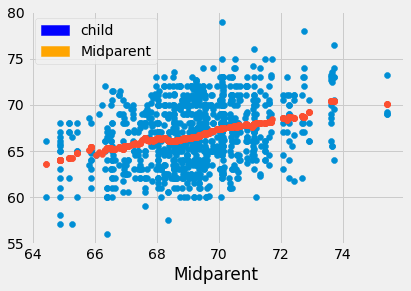

In [6]:
M=heights_with_predictions['Midparent']
C=heights_with_predictions['Child']
plt.scatter(M,C)
P=heights_with_predictions ['Prediction']
plt.scatter(M,P)
#plt.grid()
plt.xlabel("Midparent")

blue_patch = mpatches.Patch(color='blue', label='child')
orange_patch = mpatches.Patch(color='orange', label='Midparent')
plt.legend(handles=[blue_patch,orange_patch ])
plt.show()

## Measuring in Standard Units 
Let's see if we can find a way to identify this line. First, notice that linear association doesn't depend on the units of measurement – we might as well measure both variables in standard units.

In [7]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [8]:
heights_SU = pd.DataFrame({
    'MidParent SU': standard_units(heights['Midparent']),
    'Child SU': standard_units(heights['Child'])})

heights_SU

,MidParent SU,Child SU
0,3.454652,1.804156
1,3.454652,0.686005
2,3.454652,0.630097
3,3.454652,0.630097
4,2.472085,1.888017
...,...,...
929,-1.424873,-0.767591
930,-1.424873,-1.326667
931,-1.424873,-1.606205
932,-2.185390,-0.068747


In [9]:
heights_with_su_predictions = heights_SU.copy()


On this scale, we can calculate our predictions exactly as before. But first we have to figure out how to convert our old definition of "close" points to a value on the new scale. We had said that midparent heights were "close" if they were within 0.5 inches of each other. Since standard units measure distances in units of SDs, we have to figure out how many SDs of midparent height correspond to 0.5 inches.

One SD of midparent heights is about 1.8 inches. So 0.5 inches is about 0.28 SDs.

In [10]:
sd_midparent = np.std(heights.iloc[:,0])
sd_midparent

1.8014050969207576

In [11]:
0.5/sd_midparent

0.27756111096536695

We are now ready to modify our prediction function to make predictions on the standard units scale. All that has changed is that we are using the table of values in standard units, and defining "close" as above.

In [12]:
def predict_child_su(mpht_su):
    """Return a prediction of the height (in standard units) of a child 
    whose parents have a midparent height of mpht_su in standard units.
    """
    close = 0.5/sd_midparent
    close_points = heights_SU['MidParent SU'].between(mpht_su-close, mpht_su + close,inclusive = True)
    close_points=heights_SU[close_points]
    return np.mean(close_points['Child SU'])

In [13]:
heights_with_su_predictions = heights_SU.copy()
heights_with_su_predictions['Prediction SU']=heights_SU['MidParent SU'].apply(predict_child_su)
heights_with_su_predictions

,MidParent SU,Child SU,Prediction SU
0,3.454652,1.804156,0.937589
1,3.454652,0.686005,0.937589
2,3.454652,0.630097,0.937589
3,3.454652,0.630097,0.937589
4,2.472085,1.888017,1.025864
...,...,...,...
929,-1.424873,-0.767591,-0.444284
930,-1.424873,-1.326667,-0.444284
931,-1.424873,-1.606205,-0.444284
932,-2.185390,-0.068747,-0.703401


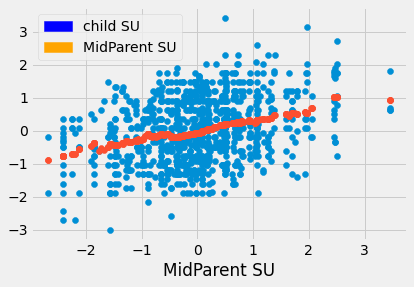

In [14]:
M=heights_with_su_predictions['MidParent SU']
C=heights_with_su_predictions['Child SU']
plt.scatter(M,C)
P=heights_with_su_predictions ['Prediction SU']
plt.scatter(M,P)
#plt.grid()
plt.xlabel("MidParent SU")

blue_patch = mpatches.Patch(color='blue', label='child SU')
orange_patch = mpatches.Patch(color='orange', label='MidParent SU')
plt.legend(handles=[blue_patch,orange_patch ])
plt.show()

This plot looks exactly like the plot drawn on the original scale. Only the numbers on the axes have changed. This confirms that we can understand the prediction process by just working in standard units.

## Identifying the Line in Standard Units 
Galton's scatter plot has a football shape – that is, it is roughly oval like an American football. Not all scatter plots are football shaped, not even those that show linear association. But in this section we will pretend we are Galton and work only with football shaped scatter plots. In the next section, we will generalize our analysis to other shapes of plots.

Here is a football shaped scatter plot with both variables measured in standard units. The 45 degree line is shown in red.

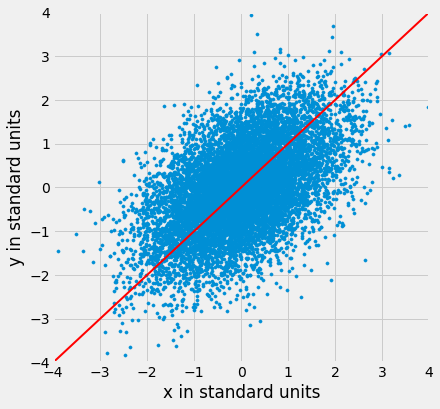

In [15]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
#plt.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
#plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('x in standard units')
plt.ylabel('y in standard units')
plt.show()

But the 45 degree line is not the line that picks off the centers of the vertical strips. You can see that in the figure below, where the vertical line at 1.5 standard units is shown in black. The points on the scatter plot near the black line all have heights roughly in the -2 to 3 range. The red line is too high to pick off the center.

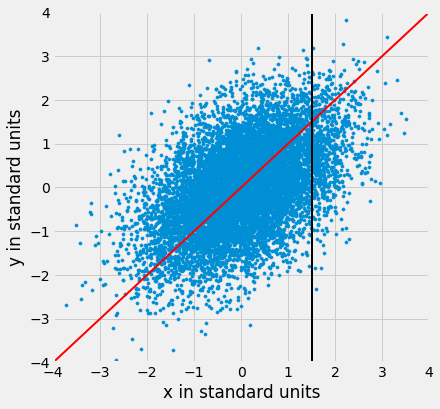

In [16]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
#plots.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('x in standard units')
plt.ylabel('y in standard units');
plt.show()

So the 45 degree line is not the "graph of averages." That line is the green one shown below.

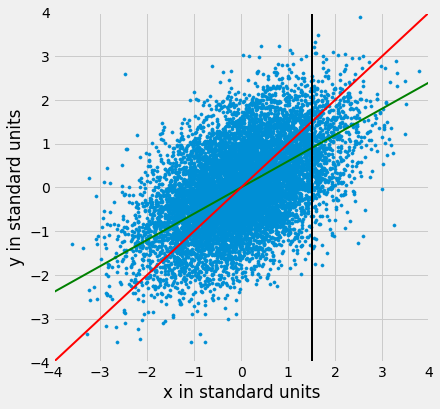

In [17]:
r = 0.5
x_demo = np.random.normal(0, 1, 10000)
z_demo = np.random.normal(0, 1, 10000)
y_demo = r*x_demo + np.sqrt(1 - r**2)*z_demo
plt.figure(figsize=(6,6))
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.scatter(x_demo, y_demo, s=10)
plt.plot([-4, 4], [-4*0.6,4*0.6], color='g', lw=2)
plt.plot([-4,4],[-4,4], color='r', lw=2)
plt.plot([1.5,1.5], [-4,4], color='k', lw=2)
plt.xlabel('x in standard units')
plt.ylabel('y in standard units')
plt.show()

Both lines go through the origin (0, 0). The green line goes through the centers of the vertical strips (at least roughly), and is flatter than the red 45 degree line.

The slope of the 45 degree line is 1. So the slope of the green "graph of averages" line is a value that is positive but less than 1.

What value could that be? You've guessed it – it's  𝑟 .

## The Regression Line, in Standard Units 
The green "graph of averages" line is called the regression line, for reasons we will explain shortly. But first, let's simulate some football shaped scatter plots with different values of  r , and see how the line changes. In each case, the red 45 degree line has been drawn for comparison.

The function that performs the simulation is called regression_line and takes  r  as its argument.

In [18]:
def regression_line(r):
    x = np.random.normal(0, 1, 10000)
    z = np.random.normal(0, 1, 10000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.figure(figsize=(6, 6))
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.scatter(x, y)
    
    plt.plot([-4, 4], [-4*r,4*r], color='g', lw=2)
    if r >= 0:
        plt.plot([-4,4],[-4,4], lw=2, color='r')
    else:
        plt.plot([-4,4], [4,-4], lw=2, color='r')
    plt.show()

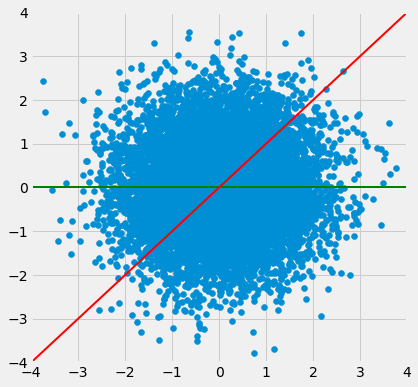

In [19]:
regression_line(0)

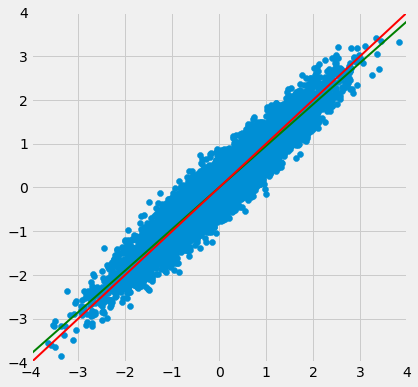

In [20]:
regression_line(0.95)

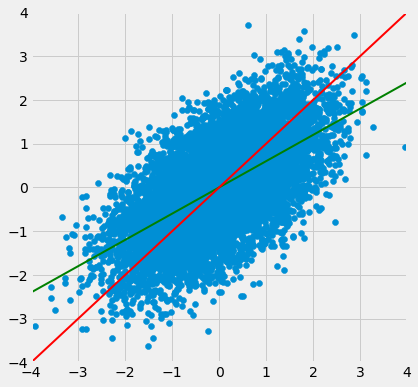

In [21]:
regression_line(0.6)

## The Regression Effect 

The Regression Effect 
In terms of prediction, this means that for a parents whose midparent height is at 1.5 standard units, our prediction of the child's height is somewhat less than 1.5 standard units. If the midparent height is 2 standard units, we predict that the child's height will be somewhat less than 2 standard units.

In other words, we predict that the child will be somewhat closer to average than the parents were.

This didn't please Sir Francis Galton. He had been hoping that exceptionally tall parents would have children who were just as exceptionally tall. However, the data were clear, and Galton realized that the tall parents have children who are not quite as exceptionally tall, on average. Frustrated, Galton called this phenomenon "regression to mediocrity."

Galton also noticed that exceptionally short parents had children who were somewhat taller relative to their generation, on average. In general, individuals who are away from average on one variable are expected to be not quite as far away from average on the other. This is called the regression effect.

The Equation of the Regression Line 
In regression, we use the value of one variable (which we will call  x ) to predict the value of another (which we will call  y ). When the variables  x  and  y  are measured in standard units, the regression line for predicting  y  based on  x  has slope  r  and passes through the origin. Thus the equation of the regression line can be written as:

estimate of y = r⋅x   when both variables are measured in standard units
 
In the original units of the data, this becomes

estimate of y − average of ySD of y = r×the given x − average of xSD of x

The slope and intercept of the regression line in original units can be derived from the diagram above.

slope of the regression line = r⋅SD of ySD of x
 
intercept of the regression line = average of y − slope⋅average of x
 
The three functions below compute the correlation, slope, and intercept. All of them take three arguments: the name of the table, the label of the column containing  x , and the label of the column containing  y .

In [22]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

In [23]:
def correlation(t, label_x, label_y):
    
    return np.mean(standard_units(t[label_x])*standard_units(t[label_y]))
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t[label_y])/np.std(t[label_x])

def intercept(t, label_x, label_y):
    return np.mean(t[label_y]) - slope(t, label_x, label_y)*np.mean(t[label_x])

The Regression Line and Galton's Data 
The correlation between midparent height and child's height is 0.32:

In [24]:
galton_r = correlation(heights, 'Midparent', 'Child')
galton_r

0.320949896063959

In [25]:
galton_slope = slope(heights, 'Midparent', 'Child')
galton_intercept = intercept(heights, 'Midparent', 'Child')
galton_slope, galton_intercept

(0.6373608969694783, 22.636240549589772)

The equation of the regression line is

estimate of child's height = 0.64⋅midparent height + 22.64
 
This is also known as the regression equation. The principal use of the regression equation is to predict  y  based on  x .

For example, for a midparent height of 70.48 inches, the regression equation predicts the child's height to be 67.56 inches.

In [26]:
galton_slope*70.48 + galton_intercept

67.55743656799861

In [27]:
p=heights_with_predictions['Midparent'] ==70.48
heights_with_predictionsn=heights_with_predictions[p]
heights_with_predictionsn.head(3)

,Midparent,Child,Prediction
33,70.48,74.0,67.634239
34,70.48,70.0,67.634239
35,70.48,68.0,67.634239


Here are all of the rows in Galton's table, along with our original predictions and the new regression predictions of the children's heights.

In [28]:
heights_with_predictions['Regression Prediction'] =galton_slope*heights['Midparent']+ galton_intercept


In [29]:
heights_with_predictions

,Midparent,Child,Prediction,Regression Prediction
0,75.43,73.2,70.100000,70.712373
1,75.43,69.2,70.100000,70.712373
2,75.43,69.0,70.100000,70.712373
3,75.43,69.0,70.100000,70.712373
4,73.66,73.5,70.415789,69.584244
...,...,...,...,...
929,66.64,64.0,65.156579,65.109971
930,66.64,62.0,65.156579,65.109971
931,66.64,61.0,65.156579,65.109971
932,65.27,66.5,64.229630,64.236786


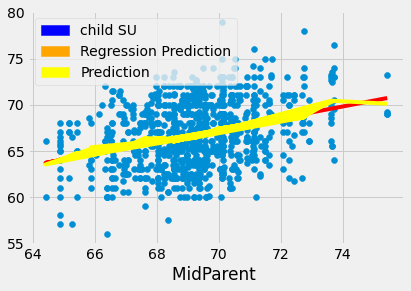

In [30]:
M=heights_with_predictions['Midparent']
C=heights_with_predictions['Child']
plt.scatter(M,C)
Q=heights_with_predictions['Prediction']
P=heights_with_predictions ['Regression Prediction']
plt.plot(M,P,color='red')
plt.plot(M,Q,color='yellow')
#plt.grid()
plt.xlabel("MidParent ")
yellow_patch = mpatches.Patch(color='yellow', label='Prediction')
blue_patch = mpatches.Patch(color='blue', label='child SU')
orange_patch = mpatches.Patch(color='orange', label='Regression Prediction')
plt.legend(handles=[blue_patch,orange_patch,yellow_patch ])
plt.show()

The grey dots show the regression predictions, all on the regression line. Notice how the line
is very close to the gold graph of averages. For these data, the regression line does a good
job of approximating the centers of the vertical strips.
Fitted Values¶
The predictions all lie on the line and are known as the "fitted values". The function fit
takes the name of the table and the labels of and , and returns an array of fitted values,
one fitted value for each point in the scatter plot.


In [31]:
def fit(table, x, y):
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table[x] + b


It is easier to see the line in the graph below than in the one above.

In [32]:
heights['Fitted']= fit(heights, 'Midparent',
'Child')

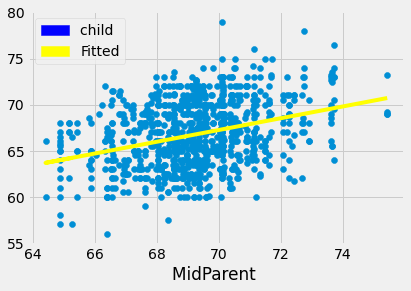

In [33]:
M=heights['Midparent']
C=heights['Child']
plt.scatter(M,C)
Q=heights['Fitted']
plt.plot(M,Q,color='yellow')
#plt.grid()
plt.xlabel("MidParent ")
yellow_patch = mpatches.Patch(color='yellow', label='Fitted')
blue_patch = mpatches.Patch(color='blue', label='child ')
plt.legend(handles=[blue_patch,yellow_patch ])
plt.show()

Another way to draw the line is to use the option fit_line=True with the Table method
scatter .


Units of Measurement of the Slope¶
The slope is a ratio, and it worth taking a moment to study the units in which it is measured.
Our example comes from the familiar dataset about mothers who gave birth in a hospital
system. The scatter plot of pregnancy weights versus heights looks like a football that has
The Regression Line
472
been used in one game too many, but it's close enough to a football that we can justify
putting our fitted line through it. In later sections we will see how to make such justifications
more formal.

In [34]:
baby=pd.read_csv('baby.csv')
baby

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False
...,...,...,...,...,...,...
1169,113,275,27,60,100,False
1170,128,265,24,67,120,False
1171,130,291,30,65,150,True
1172,125,281,21,65,110,False


In [35]:
baby['Fitted']= fit(baby, 'Maternal Height',
'Maternal Pregnancy Weight')

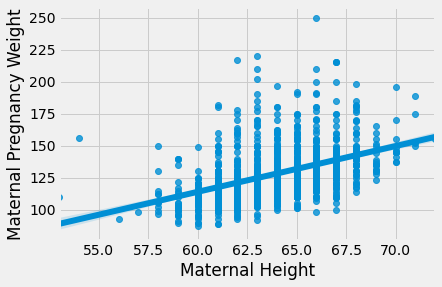

In [36]:
sns.regplot(baby['Maternal Height'], baby['Maternal Pregnancy Weight'], fit_reg=True)

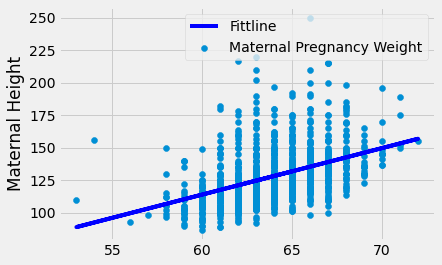

In [37]:
plt.scatter(baby['Maternal Height'], baby['Maternal Pregnancy Weight'], label = 'Maternal Pregnancy Weight')
plt.plot(baby['Maternal Height'], fit(baby,'Maternal Height','Maternal Pregnancy Weight'), color = 'blue', label = 'Fittline')
plt.ylabel('Maternal Pregnancy Weight')
plt.ylabel('Maternal Height')
plt.legend(loc='upper right')
plt.show()

In [38]:
slope(baby, 'Maternal Height', 'Maternal Pregnancy Weight')


3.572846259275052

The slope of the regression line is 3.57 pounds per inch. This means that for two women
who are 1 inch apart in height, our prediction of pregnancy weight will differ by 3.57 pounds.
For a woman who is 2 inches taller than another, our prediction of pregnancy weight will be
pounds more than our prediction for the shorter woman.
Notice that the successive vertical strips in the scatter plot are one inch apart, because the
heights have been rounded to the nearest inch. Another way to think about the slope is to
take any two consecutive strips (which are necessarily 1 inch apart), corresponding to two

## Endnote¶
Even though we won't establish the mathematical basis for the regression equation, we can
see that it gives pretty good predictions when the scatter plot is football shaped. It is a
surprising mathematical fact that no matter what the shape of the scatter plot, the same
equation gives the "best" among all straight lines. That's the topic of the next section.